#Handwritten Digit Classifier

Uses Convolutional Neural Network (CNN) implemented in Keras to classify handwritten digits into the 10 categories, using the MNIST database, which contains black and white, 28x28 images of handwritten digits. (27000 training samples, 2998 test samples)

The model achieved 98% accuracy within 5 epochs with Adadelta optimizer!

1.   Convolution Layer (4x4 kernel size, 32 total filters)

2.    Flatten Layer

3.    Dense Layer (100 nodes, rectified linear activation)

4.    Dense Output Layer (10 nodes, softmax activation)

In [1]:
from keras.layers import Dense, Conv2D, Flatten
from keras.models import Sequential

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
size = 29998
cutoff = 27000

In [0]:
#loading the dataset
train_dataset = pd.read_csv('sample_data/mnist_train_small.csv')
test_dataset = pd.read_csv('sample_data/mnist_test.csv')
entire_dataset = np.concatenate((train_dataset, test_dataset), axis=0)

In [0]:
#splitting the dataset between training and testing
train_dataset = entire_dataset[:cutoff]
test_dataset = entire_dataset[cutoff:]

train_y, train_x = np.split (train_dataset, [1], axis=1)
test_y, test_x = np.split (test_dataset, [1], axis=1)

In [0]:
#normalizing the data
train_x = train_x.astype(float)
test_x = test_x.astype(float)


def normalize_data (input_arr):
  for index in range(input_arr.shape[0]):
    input_arr[index] = input_arr[index]/255
for i in range(train_x.shape[0]):
  normalize_data(train_x[i])
for i in range(test_x.shape[0]):
  normalize_data(test_x[i])

In [0]:
#reshaping the x datasets so they look more like images
train_x = train_x.reshape((cutoff, 28, 28, 1))
test_x = test_x.reshape((size-cutoff, 28, 28, 1))

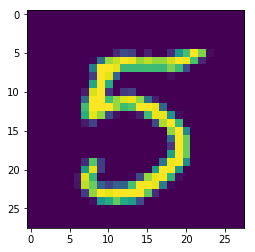

In [7]:
#visualizing an image using matplotlib
plt.imshow(train_x[0].reshape(28,28))

In [8]:
#making the model
model = Sequential()
model.add(Conv2D(32, 4))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile('Adadelta', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
#training the model
model.fit(x=train_x, y=train_y, batch_size=128, epochs=5, validation_data=(test_x, test_y))

Instructions for updating:
Use tf.cast instead.
Train on 27000 samples, validate on 2998 samples
Epoch 1/5
27000/27000 [==============================] - 8s 295us/step - loss: 0.3612 - acc: 0.8897 - val_loss: 0.1080 - val_acc: 0.9673
Epoch 2/5
27000/27000 [==============================] - 2s 90us/step - loss: 0.1483 - acc: 0.9564 - val_loss: 0.0840 - val_acc: 0.9767
Epoch 3/5
27000/27000 [==============================] - 2s 91us/step - loss: 0.1006 - acc: 0.9695 - val_loss: 0.0802 - val_acc: 0.9787
Epoch 4/5
27000/27000 [==============================] - 2s 89us/step - loss: 0.0705 - acc: 0.9790 - val_loss: 0.0661 - val_acc: 0.9820
Epoch 5/5
27000/27000 [==============================] - 2s 88us/step - loss: 0.0519 - acc: 0.9844 - val_loss: 0.0658 - val_acc: 0.9810


Sample # 21236
Model predicted 1
Actual value 1
Correct prediction!


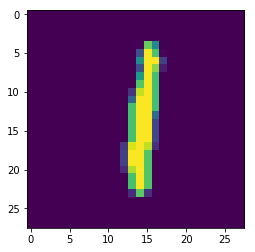

In [10]:
#visualizing results
value = int((np.random.rand(1)[0])*cutoff)
print ('Sample #', value)

plt.imshow(train_x[value].reshape(28,28))

predicted = np.argmax(model.predict(train_x[value].reshape((1,28,28,1)))[0])
print('Model predicted', predicted)

actual = train_y[value][0]
print('Actual value', actual)

if (predicted == actual):
  print('Correct prediction!')
else:
  print('Wrong prediciton.')